# Consumer Behavior Analysis with Economic Indicators

### Importing all modules and generating dataset

In [1]:
import fredapi as fa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
from datetime import datetime
# importing config for my API Key
# If replicating, add a config.py file with your API Key
from config import API_KEY
api_key = API_KEY

In [2]:
fred = fa.Fred(api_key)

In [3]:
# %, not SA, Monthly
effective_rate = fred.get_series("FEDFUNDS", frequency="q", aggregation_method="avg")
# %, SA, Monthly
unemployment_rate = fred.get_series("UNRATE", frequency="q", aggregation_method="avg")
# % change, SA, monthly
sticky_cpi = fred.get_series("STICKCPIM157SFRBATL", frequency="q", aggregation_method="avg")
# Percent change from a year ago, quarterly
pce = fred.get_series("PCE", units="pc1", frequency="q", aggregation_method="avg")
# % change from a year ago, SA, Monthly
median_cpi = fred.get_series("MEDCPIM159SFRBCLE", units="pch", frequency="q", aggregation_method="avg")
# Millions, SA, monthly, check if pct change is better
retail_sales = fred.get_series("RSFSXMV", frequency="q")
# Billions, SA, Weekly ending wed
# Measures credit card debt
consumer_loans = fred.get_series("CCLACBW027SBOG", frequency="q", aggregation_method="avg")
# Percent change from a year ago, quarterly
psavings_rate = fred.get_series("PSAVERT", units="pc1", frequency="q", aggregation_method="avg")
# debt to salary ratio, better for understanding consumer debt behavior
# Percent change from a year ago, quarterly
debt_sp = fred.get_series("CDSP", units="pc1", frequency="q")
# 1982-1984 CPI Adj $, SA, quarterly
wages = fred.get_series("LES1252881600Q", units="pc1", frequency="q")
# Core CPI, change from a year ago, quarterly
core_cpi = fred.get_series("CPILFESL", units="pc1", frequency="q")

In [5]:
# Name series
effective_rate.name = "Fed Rate"
unemployment_rate.name = "Unemployment Rate"
sticky_cpi.name = "Sticky CPI"
pce.name = "PCE"
median_cpi.name = "Median CPI"
retail_sales.name = "Retail Sales ex MV"
consumer_loans.name = "Consumer Loans"
psavings_rate.name = "Personal Savings Rate"
debt_sp.name = "Consumer Debt"
wages.name = "Wages"
core_cpi.name = "Core CPI"

In [8]:
df_list = [
    effective_rate, unemployment_rate, sticky_cpi, pce, median_cpi, retail_sales,
    consumer_loans, psavings_rate, debt_sp, wages, core_cpi
]
df = pd.concat(df_list, axis=1)

In [9]:
df = df.loc["2000-07-01":]
df.index.name = "Date"

In [10]:
df = df.dropna()

### Fed Rate with different lags and Correlation Matrix

In [11]:
df['Fed Rate 3M'] = df['Fed Rate'].shift(3)   # 6 months lag (assuming monthly data)
df['Fed Rate 6M'] = df['Fed Rate'].shift(6)   # 6 months lag (assuming monthly data)
df['Fed Rate 12M'] = df['Fed Rate'].shift(12)  # 1 year lag
df['Fed Rate 18M'] = df['Fed Rate'].shift(18) # 18 months lag
df.corr()

,Fed Rate,Unemployment Rate,Sticky CPI,PCE,Median CPI,Retail Sales ex MV,Consumer Loans,Personal Savings Rate,Consumer Debt,Wages,Core CPI,Fed Rate 3M,Fed Rate 6M,Fed Rate 12M,Fed Rate 18M
Fed Rate,1.000000,-0.582446,0.398269,0.219555,-0.055638,0.007966,-0.161618,-0.010173,0.411884,-0.000254,0.363353,0.761745,0.288308,-0.177514,0.115365
Unemployment Rate,-0.582446,1.000000,-0.622968,-0.522758,-0.122784,-0.318011,-0.184968,0.332304,-0.577759,0.156946,-0.538807,-0.317220,0.042253,0.421093,0.396290
Sticky CPI,0.398269,-0.622968,1.000000,0.589981,0.347944,0.543892,0.316602,-0.290534,0.471973,-0.321125,0.905588,0.201367,-0.071106,-0.163835,-0.111331
PCE,0.219555,-0.522758,0.589981,1.000000,0.385290,0.292380,0.106258,-0.622617,0.326763,-0.748852,0.561571,-0.087786,-0.230287,-0.030946,0.052508
Median CPI,-0.055638,-0.122784,0.347944,0.385290,1.000000,0.106476,0.105904,-0.276725,0.076439,-0.383422,0.251758,-0.162008,-0.306391,-0.097647,0.159818
Retail Sales ex MV,0.007966,-0.318011,0.543892,0.292380,0.106476,1.000000,0.925402,0.001969,0.078286,-0.007214,0.654163,-0.179284,-0.385995,-0.425667,-0.335676
Consumer Loans,-0.161618,-0.184968,0.316602,0.106258,0.105904,0.925402,1.000000,0.061301,-0.016532,0.096111,0.419953,-0.332209,-0.545272,-0.530405,-0.350399
Personal Savings Rate,-0.010173,0.332304,-0.290534,-0.622617,-0.276725,0.001969,0.061301,1.000000,-0.535478,0.649861,-0.251693,0.201530,0.310771,0.009603,-0.151589
Consumer Debt,0.411884,-0.577759,0.471973,0.326763,0.076439,0.078286,-0.016532,-0.535478,1.000000,-0.221225,0.461311,0.198479,-0.121734,-0.197256,0.076704
Wages,-0.000254,0.156946,-0.321125,-0.748852,-0.383422,-0.007214,0.096111,0.649861,-0.221225,1.000000,-0.277396,0.184193,0.185896,-0.120193,-0.361027


# Analysis Stage

## Visualizing data

#### How does the Fed Rate impact unemployment over time?

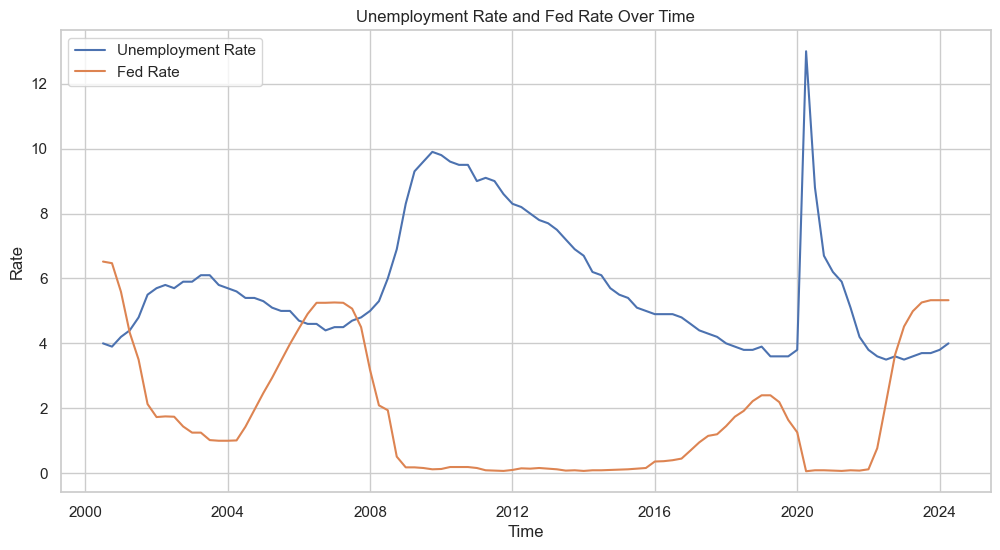

In [12]:
sns.set(style="whitegrid")
warnings.filterwarnings("ignore") 

plt.figure(figsize=(12, 6))

sns.lineplot(x=df.index, y=df["Unemployment Rate"], label="Unemployment Rate")
sns.lineplot(x=df.index, y=df["Fed Rate"], label="Fed Rate")
plt.title("Unemployment Rate and Fed Rate Over Time")
plt.xlabel("Time")
plt.ylabel("Rate")
plt.legend()

plt.show()

The graph illustrates a clear inverse relationship between the Fed Funds Rate and the Unemployment Rate, particularly during key economic events such as the 2008 financial crisis and the pandemic. This relationship aligns with expectations, as the Federal Reserve considers unemployment, along with other important economic indicators, when deciding monetary policy, including rate cuts.

#### 1. 2008 Financial Crisis
- In response to the sharp rise in unemployment, which peaked at 10% in 2009, the Fed took action by lowering interest rates to near zero. The objective was to stimulate economic activity by reducing the cost of borrowing, which encourages both consumer spending and business investment to reverse negative economic effects.

#### 2. COVID-19 Pandemic
- In response to the sharp rise in unemployment during this time frame, the Fed responded with lowering rates to near zero once again. The shutdown triggered an aggressive monetary response by the Fed to stimulate expansion.

The graph suggests a slighty lagged relationship between these two variables, where the Fed's policy actions often persist even after the unemployment rate improves. The Fed tends to keep interest rates low for extended periods even as unemployment declines; this reflects its efforts to sustain economic growth and ensure a robust recovery. On the other hand, businesses may anticipate rate cuts and expand early by hiring more employees.

The Fed lowers interest rates with the goal of taming inflation. Higher interest rates mean the cost of borrowing money is higher, which theoretically contracts spending across all sectors of the economy. The scope of this EDA focuses more on the consumer side, where we will look at how interest rates affect consumer spending patterns. 



## Comparison of Economic Variables relating to the Consumer

__Note: Blue lines belong to variables on the left axis, red lines belong to variables on the right axis__ 

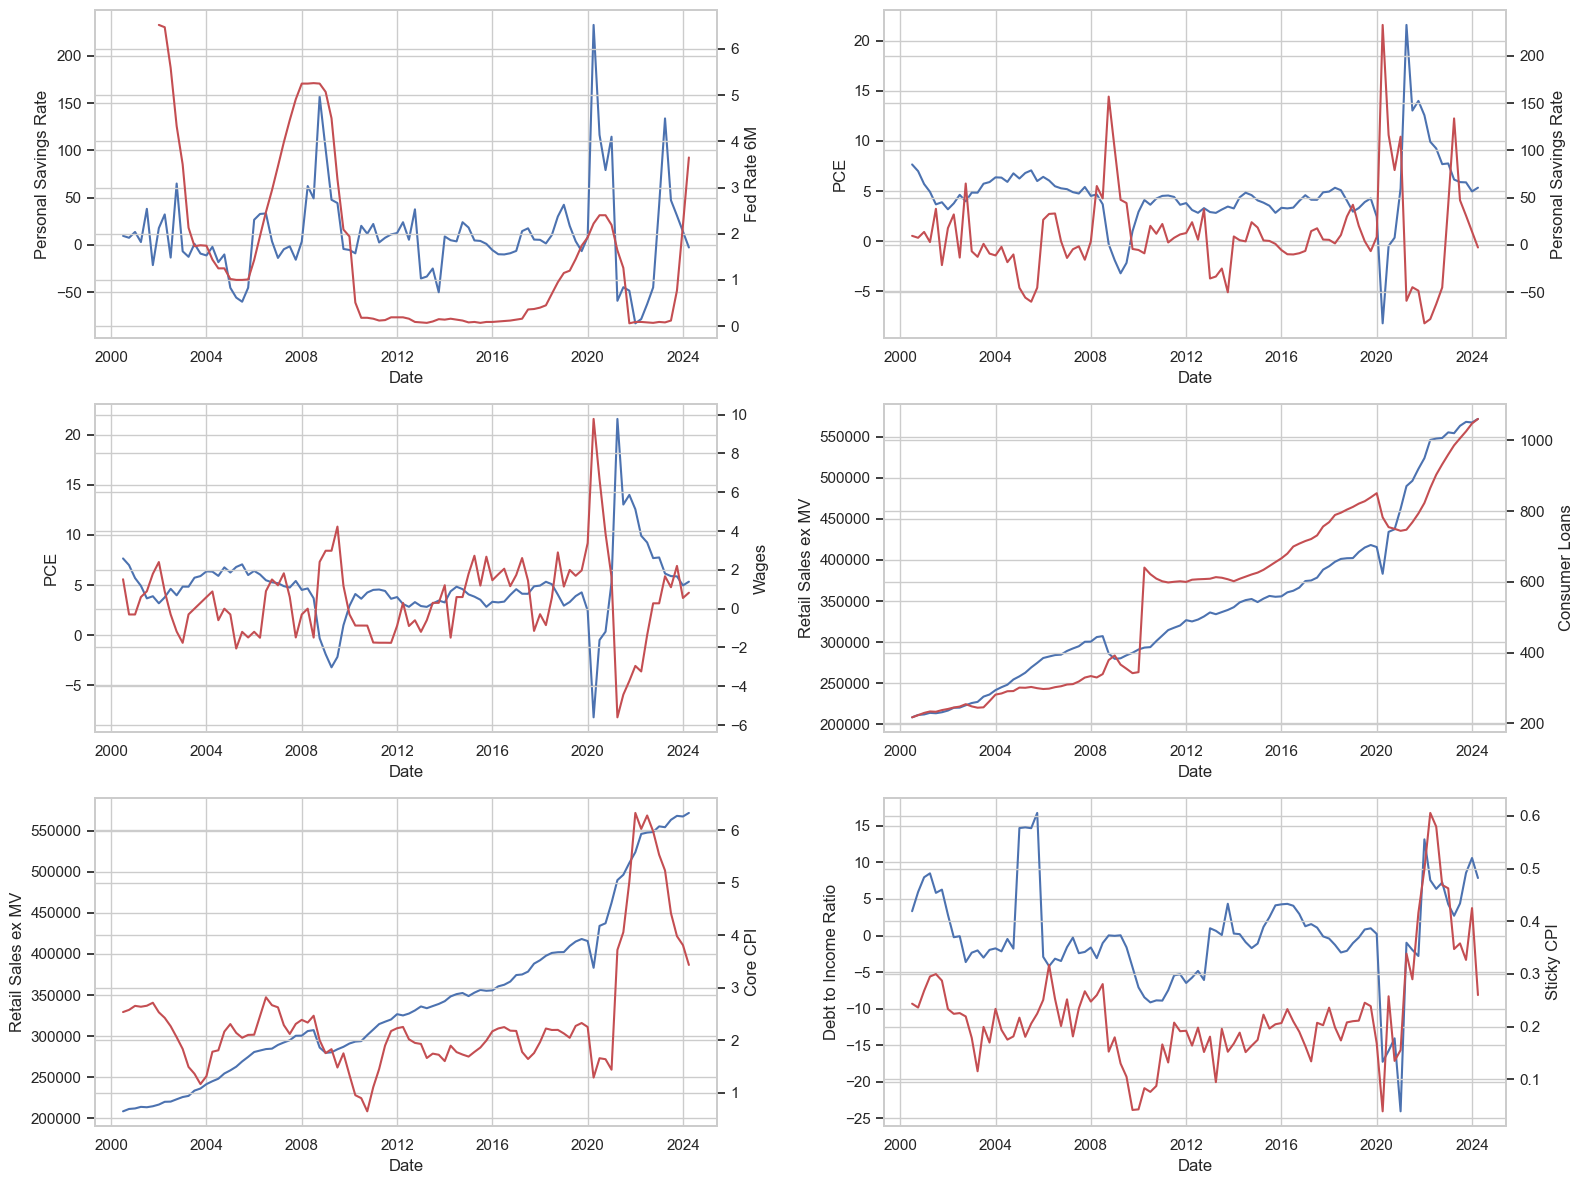

In [13]:
sns.set(style="whitegrid")
warnings.filterwarnings("ignore") 

fig, axes = plt.subplots(3, 2, figsize=(16, 12))
ax1 = axes[0,0]
sns.lineplot(data=df, x="Date", y="Personal Savings Rate", ax=ax1, color="b")
ax1_twin = ax1.twinx()
sns.lineplot(data=df, x="Date", y="Fed Rate 6M", ax=ax1_twin, color="r")

ax2 = axes[0,1]
sns.lineplot(data=df, x="Date", y="PCE", ax=ax2, color="b")
ax2.set_ylabel("PCE")
ax2_twin = ax2.twinx()
sns.lineplot(data=df, x="Date", y="Personal Savings Rate", ax=ax2_twin, color="r")

ax3 = axes[1,0]
sns.lineplot(data=df, x="Date", y="PCE", ax=ax3, color="b")
ax3_twin = ax3.twinx()
sns.lineplot(data=df, x="Date", y="Wages", ax=ax3_twin, color="r")

ax4 = axes[1,1]
sns.lineplot(data=df, x="Date", y="Retail Sales ex MV", ax=ax4, color="b")
ax4_twin = ax4.twinx()
sns.lineplot(data=df, x="Date", y="Consumer Loans", ax=ax4_twin, color="r")


ax5 = axes[2,0]
sns.lineplot(data=df, x="Date", y="Retail Sales ex MV", ax=ax5, color="b")
ax5_twin = ax5.twinx()
sns.lineplot(data=df, x="Date", y="Core CPI", ax=ax5_twin, color="r")

ax6 = axes[2,1]
sns.lineplot(data=df, x="Date", y="Consumer Debt", ax=ax6, color="b")
ax6.set_ylabel("Debt to Income Ratio")
ax6_twin = ax6.twinx()
sns.lineplot(data=df, x="Date", y="Sticky CPI", ax=ax6_twin, color="r")

plt.tight_layout()
plt.show()

## Plot Insights

### Figure 1: Personal Savings Rate and Fed Rate (with 6 month lag) over time
The Fed Rate (lagged) demonstrates a linear relationship with the Personal Savings Rate, albeit a relatively weak one, as evidenced by a coefficient of 0.3. This suggests that monetary policy partially influences savings, however there are many other variables that come into play. The 6-month lag is a reasonable approximation to reflect how consumers asjust their behavior in response to changing interest rates. As discussed though, this relationship is complex, as external factors like inflation, fiscal policy, and consumer sentiment also influence savings behavior. In theory, higher Fed Rates incentivize savings, as returns on savings accounts and bonds improve. However, the data suggests this relationship is not very consistent, likely due to inflation eroding disposable income or consumers choosing to pay down debt instead. Although higher interest rates encourage saving for some, the overall effect may be diluted by rising debt costs and inflationary pressures.

### Figure 2: PCE and Personal Savings Rate
Figure 2 shows an inverse relationship between these two variables, which was also suggested by a correlation coefficient of approximately -0.6. The comparison of percent change from a year ago between both variables reveals significant relationships and insights. As PCE tends to increase over time, the Personal Savings Rate decreases, which suggests the typical trend that as consumers spend more due to inflation, they tend to save less. There are significant spikes and dips around 2020, which put in context reflect how consumers saved their stimulus payments and tended to spend less due to the pandemic. This temporary surge in savings later declined to record levels due to a spike in inflation, where consumers used their savings or relied on credit to maintain their spending habits. 

There are significant spikes and dips in 2020, which put in context suggest that consumers saved their stimulus payments as they had fewer opportunities to spend. This temporary surge in savings later declined to record levels as consumers used their savings or used more credit to maintain their spending habits. 

The steady growth in PCE indicates a consistent increase in PCE spending. This is a common occurance as the economy grows, but the divergence between saving and spending may indicate financial strain on consumers.

### Figure 3: PCE and Nominal Wage Growth
There is a strong inverse relationship between these two variables. This reflects broader economic imbalances where consumer spending and inflation tend to rise faster than wages, particularly during economic shocks or recoveries. During periods of high PCE growth (which often means rising inflation), there is no subsequent match in nominal wage growth. As well as in this figure, the erosion of consumers' purchasing power can be seen in other areas like the savings rate and the debt-to-income ratio, where the long-term trend of consumers relying more on credit was described. There is a mismatch between spending and wages, where employers may be slow to adjust wages. PCE may recover faster than nominal wages as consumer spending rebounds, but wage growth often lags due to a slower recovery in labor markets.

### Figure 4: Retail Sales Excluding Motor Vehicles and Consumer Loans
The graph highlights an upward trend in both variables. This suggests that consumers rely on credit to finance their spending and indicates that access to credit plays an essential role in supporting consumer spending levels. Both of these variables dip during economic downturns (2008 and 2020), which suggests that consumers were more catious with their spending and less reliant on credit during these periods. The decline in Retail Sales might reflect consumers cutting back on discretionary spending, or switching to inexpensive brands, such as private labels. As discussed previously, banks may also tighten their lending standards during these downturns, limiting consumers' access to credit. After 2020, both of these variables show a sharp rebound, possibly due to government stimulus, low interest rates, and pent-up demand. This signals a return to consumer confidence and spending growth. However, this also suggests a general long-term trend on consumers relying on credit and eating up savings.

### Figure 5: Retail Sales Excluding Motor Vehicles and Core CPI
Figure 5 makes a crucial comparison to provide insights into how inflation in essential goods and services (as captured by Core CPI) impacts consumer spending behavior. Although not very distinguishible, the coefficient of this relationship is 0.64, which highlights a moderate to strong linear relationship because CPI directly influences Retail Sales. Although Retail Sales increase nominally, this does not mean real growth in consumer spending but rather higher prices consumers are paying. During the pandemic, Retail Sales increased sharply due to fiscal stimulus and pent-up demand. This divergence suggests that government interventions temporarily shielded consumers from inflationary pressures. However, inflation rebounded to record levels, which inevitably affected consumers as seen by savings rates and debt-to-income ratios.

### Figure 6: Debt-to-Income Ratio and Sticky CPI
There seems to be a moderate positive relationship between these two variables, as also highlighted by the coefficient of about 0.47. This relationship may describe consumers' reaction to inflationary pressures by servicing more debt to maintain their spending levels, as highlighted by the comparison of PCE and Personal Savings Rates. Inflation erodes purchasing power, forcing consumers to use credit or other financial instruments to meet their needs. However, during economic downturns in 2008 and 2020, both of these variables decline sharply. This could indicate lower borrowing activity, as consumers may become more cautious during these periods and deflationary pressures due to weaker demand. After 2020, both of these measures, reverting back to financial strain on consumers due to rising prices. Still, as seen in figure 4, this trend also raises concerns about the long-term sustainability of rising debt levels, especially if inflation grows at a persistent rate or borrowing costs increase.


## Key Takeaways

### Economic Downturns drive precautionary saving and reduced debt reliance
- During economic downturns, the Personal Savings Rate spikes as consumers become more cautious and opt to save rather than spend. This behavior reflects precautionary savings driven by uncertainty.
- Debt-to-Income Ratios tend to decline during these downturns, suggesting that consumers are more debt-averse when facing high unemployment and economic uncertainty. This indicates a shift towards financial conservatism during recessions.

### Stimulus and Low-Interest Rate policies fuel post-crisis spending and debt uptake
- After each downturn, as conditions stabilize and interest rates remain low, consumers tend to return to higher spending and increased debt reliance.
- The faster rise in consumer leverage after the pandemic suggests that low interest rates, pent-up demand, and stimulus payments created a strong apetite for consumer spending and borrowing.

### Persistent inflation erodes consumers' ability to save
- Rising inflation post-2021 (as shown in Figure 6 by the Sticky CPI) has put sustained pressure on consumers, reducing their ability to save even as interest rates have risen. This indicates consumers are allocating more of their income to essential spending as prices rise.
- Higher interest rates during 2022 did not result in an elevated personal savings rate, as inflation reduced the consumers' ability to save. This highlights consumers' financial vulnerability as they have limited disposable income for savings.
- The strong inverse relationship between wage growth and PCE highlights how inflation pressures businesses to prioritize cost control over wage hikes. This pattern is consistent with periods of monetary tightening, where the Fed raises interest rates to cool demand (control inflation).

### Credit reliance as a response to Income-Expenditure Gaps
- The upward trend in PCE relative to Consumer Loans reflect the consumer's reliance on credit to maintain spending levels.
- This reliance on credit is particularly evident after 2020, where consumers, despite higher costs, have continued to borrow to sustain spending. This pattern may signal increasing financial vulnerability if consumers are heavily relying on debt in a high-inflation environment.

Looking further
Consumers spend more as inflation increases. Has there been an increase in wage growth?
Has inflation eaten away wages? Comparing the purchasing power of wages

Further evidence on price pressures on consumers

### Financial vulnerability in high debt and low savings contexts
- The recent increase in Debt-to-Income Ratio alongside a low Personal Savings Rate suggests potential financial strain as consumers face rising costs. 
- If wage growth does not keep with inflation, consumers may become increasingly reliant on debt, especially in a context where savings are low. This vulnerability is compounded by the fact that, even as wages have grown, inflation (Median CPI) has outpaced wage growth, eroding purchasing power. This gap implies that consumers are under pressure to maintain spending by leveraging credit or reducing savings, putting them in a more precarious financial position if economic conditions deteriorate.

## Exploring Nominal Wage Growth with Sticky CPI and PCE

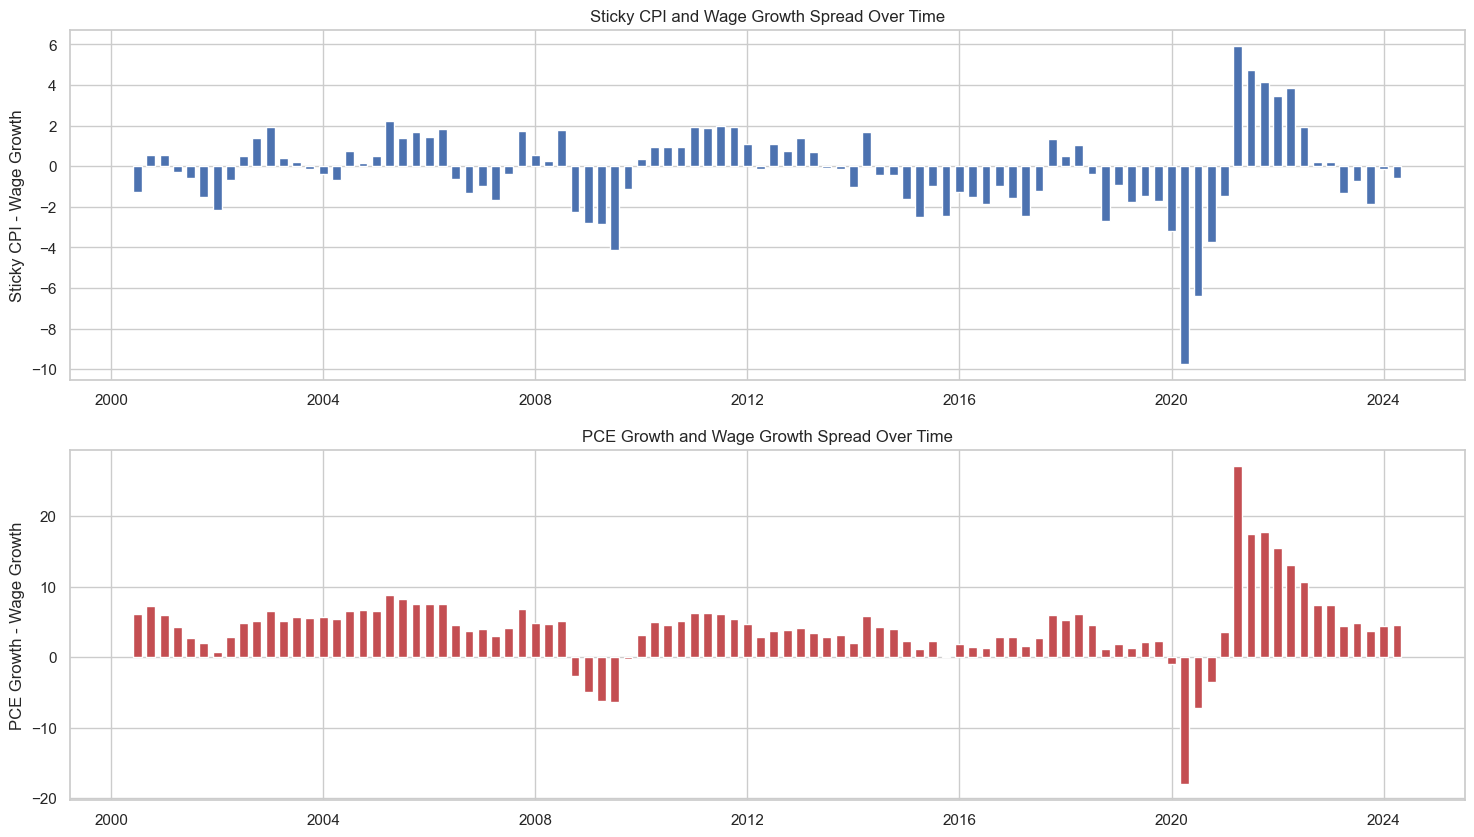

In [14]:
fig, axes = plt.subplots(2, 1, figsize=(18,10))
ax1 = axes[0]
wage_cpi_spread = df["Sticky CPI"] - df["Wages"]
ax1.bar(df.index, wage_cpi_spread, width=60)
ax1.set_ylabel("Sticky CPI - Wage Growth")
ax1.set_title("Sticky CPI and Wage Growth Spread Over Time")


ax2 = axes[1]
wage_pce_spread = df["PCE"] - df["Wages"]
ax2.bar(df.index, wage_pce_spread, width=60, color="r")
ax2.set_ylabel("PCE Growth - Wage Growth")
ax2.set_title("PCE Growth and Wage Growth Spread Over Time")

plt.show()


### Figure 1: Sticky CPI and Wage Growth Spread Over Time
This figure represents the difference between Sticky CPI growth and Wage Growth. Positive values in the figure indicate inflation outpacing wage growth, or a decline in consumers' purchasing power. This suggests that consumers are facing financial strain, as their income is not keeping up with rising costs. Conversely, negative values suggest that wage growth outpaces inflation. This scenario is favorable to consumers, as their purchasing power improves. 

#### Implications of the shift from Positive to Negative values
As discussed above, positive values decreasing and small negative values beginning to appear indicate that the quarterly change in wage growth is outpacing the quarterly change in Sticky CPI, resulting in an improvement in purchasing power. However, small negative values only mean that there is a slight recovery in purchasing power. If the small negative values are only slight, this adjustment may not be strong enough to fully offset previous positive values, which mean loss of purchasing power. Consumers might experience some relief, but if this decline is still modest, they may continue to feel financial strain even though conditions are slightly improving.

Relating to our previous analysis, there are instances where Median CPI significantly outpaces wage growth. Although there are various points where the inverse is true, the spread may not be significant enough to relieve the consumer from previous losses in purchasing power. These price pressures and declines in purchasing power serve as evidence for our previous statements that consumers' have been struggling to save, therefore relying more on credit to finance their spending.


### Figure 2: PCE Growth and Wage Growth Spread Over Time
The persistent positive spread in this figure highlight that PCE has outpaced nominal wage growth for most of the periods shown, which clearly indicates how consumers' purchasing power has been eroded. This is particularly pronounced during periods of economic shocks or recoveries, such as during and after the 2008 financial crisis and the pandemic. During these downturns, the spread tends to widen, which suggests that while consumer prices rise rapidly, wage growth lags significantly. This trend reflects the challenges faced by workers during recessions when wages are typically stagnant, yet costs continue to increase.

#### Implications for Consumers
The dominance of positive spreads over time indicates that inflation, as measured by PCE, has been a persistent burden for consumers. This would force households to either cut back on spending, dip into savings, or rely on credit (as was seen in the above section). Although there was temporary relief during periods of negative spread, these were short-lived and insufficient to offset the long-term imbalance.

## Calculating and Analyzing Real Wage Growth

To estimate real wage growth since our base date (July 2000, where index=100), an attempt was made to calculate the compounded growth for each entry in our dataset.

In [15]:
cummulative_idx = [100]
for i in range(1, len(df)):
    real_wage_growth = (df["Wages"].iloc[i] - df["Core CPI"].iloc[i]) / 100
    cummulative_idx.append(cummulative_idx[-1] * (1 + real_wage_growth))

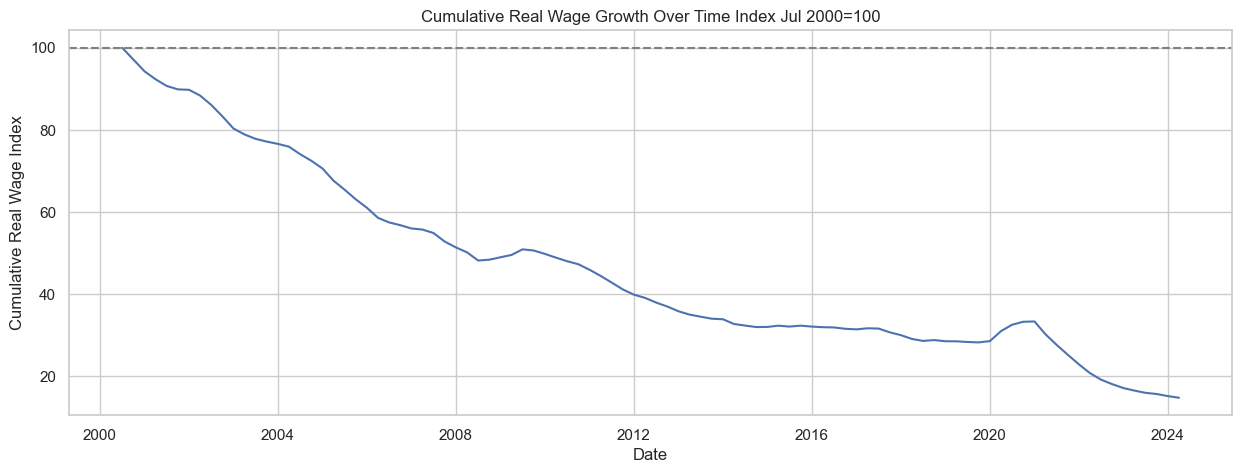

In [16]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df.index, y=cummulative_idx)
plt.axhline(100, color='grey', linestyle='--')
plt.title('Cumulative Real Wage Growth Over Time Index Jul 2000=100')
plt.xlabel('Date')
plt.ylabel('Cumulative Real Wage Index')
plt.show()

## More accurate representation of the graph (using Median CPI)

![title](Real_Wage_Graph.png)

This graph more accurately represents what wanted to be shown about real wage growth. For this calculation, the Core CPI percent change from a year ago was subtracted from the wage growth percent change from a year ago to more accurately reflect the desired metric. An index for July 2000 could not be established in the fred website due to technical issues, meaning this graph represents the percent change from a year ago.

### Insights from both figures
Using the base date of July 2000, the real wage growth can be seen as steadily declining due to inlfation significantly outpacing nominal wage growth. Various steep declines in this graph are due to periods where inflation increases steadily while wage growth declines at a negative rate. 

The following key insights can be gathered both figures:
- The periods of negative real wage growth dominate the graph, which suggests that purchasing power has been eroded over time.
- During economic downturns, the attempts to tame inflation and increase wages result in brief periods of real wage growth. This growth later recovers as inflation either spiked or nominal wages had slower growth.
- The 2022 interest rate increases as an effort to stabilize post-pandemic inflation resulted in a recovery of real wage growth. This suggests that policy measures appear to take significant time to affect real wage growth, highlighting the lag effect of monetary policy.
- Extended periods of negative wage growth suggest consistent pressure on consumer finances.
- This decline in real wages confirms our prior beliefs that a consumer's purchasing power has eroded, which results in heavier reliance on credit and savings to stay afloat. The following interpretation also aligns with the second figure, as real wage growth can be seen declining at various periods, while its recovery is only small.

### Limitations of the first figure and the metric's calculation
The median CPI percent change data retrieved for this analysis shows some irrgularities, particularly during 2010-2011. These stem from discrepancies between data transformations applied on the FRED website and those available via the API, or from the inherent volatility in the Median CPI series during these periods. Core CPI was used for this reason because both metrics are very similar. There are other limitations as to the accuracy and reliability of this calculation.

## Conclusions from this analysis

This analysis provides a comprehensive understanding of how macroecnomic factors, such as interest rates, inflation, wage growth, and consumer spending, interact to shape a consumer's behavior and his financial health. Key patterns emerge, highlighting the complex relationship between monetary policy, economic downturns, inflation, and household financial resilience. The following can be inferred from this analysis:

- Periods of economic distress, such as the 2008 financial crisis and the COVID-19 pandemic reveal a clear pattern of precautionary savings and reduced reliance on debt. While these periods show consumers shifting towards financial conservatism, the subsequent recoveries highlight how consumers rely more on credit to continue spending.

- Persistent inflation has been a critical factor eroding purchasing power over time. Despite brief periods of real wage growth during economic recoveries, the long-term dominance of inflation over wage growth has not been offset. This prolonged pressure on real wages forces consumers to rely on savings or credit to maintain their standards of living, as highlighted by the significant reliance on consumer loans.

- The delayed impact of monetary policy is evident throughout the analysis. Efforts made by the Federal Reserve to combat inflation through interest rate hikes often take significant time to influence real wage growth and savings. The post-pandemic recovery underscores this lag effect, with inflationary pressures outpacing the intended benefits of higher interest rates.

- The analysis reveals an alarming trend of increasing debt reliance as a coping mechanism for income-expenditure imbalances. While consumers have been able to sustain spending, the upward trajectory of consumer loans relative to spending highlights the growing financial vulnerability of households. Coupled with real wage growth, this trend raises concerns about the sustainability of current spending patterns, especially in a high-inflation environment.